<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/Jobsheet_6_praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 35.3 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00011348724365234375
Waktu IVF+PQ: 0.00017189979553222656


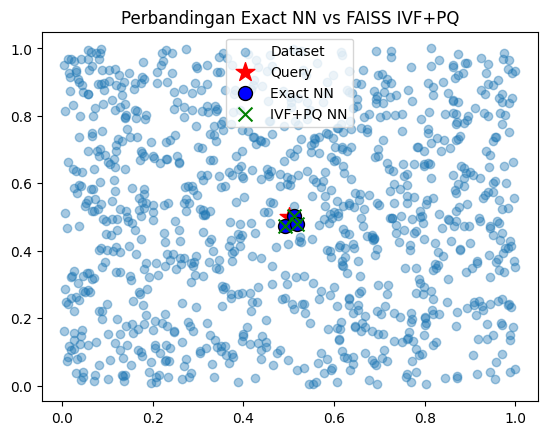

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data.

--- 1. PERCOBAAN METRIK JARAK (L2 vs L1) ---
Exact NN L2 (Euclidean) indices: [137 170 750] distances: ['0.0001', '0.0008', '0.0008']
Waktu L2: 0.000179s
Exact NN L1 (Manhattan) indices: [137 170 750] distances: ['0.0129', '0.0349', '0.0399']
Waktu L1: 0.003118s
--------------------------------------------------
--- 2. PERCOBAAN UKURAN DATA (1000 vs 1.000.000) ---
Waktu Exact (Flat) 1 Juta data: 0.005564s
Waktu IVF+PQ 1 Juta data: 0.000794s
Indeks Exact: [286942 583487 695123]
Indeks IVF+PQ: [286942 583487 695123]
--------------------------------------------------
--- 3. PERCOBAAN DIMENSI DATA (2D vs 5D) ---
Waktu Exact (Flat) 5D data: 0.000102s
Waktu IVF+PQ 5D data: 0.000149s
Indeks Exact: [895 451 375]
Indeks IVF+PQ: [182 172 848]
--------------------------------------------------


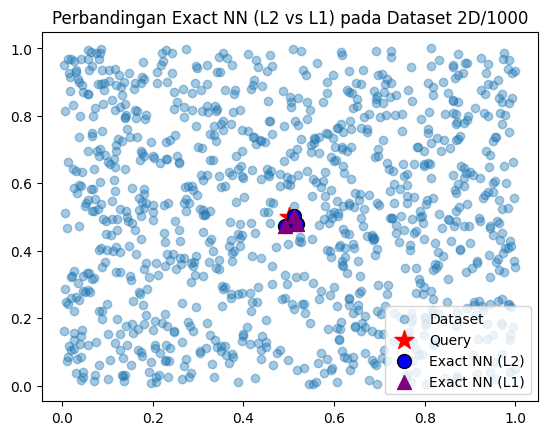

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# ==============================================================================
# 1. PERCOBAAN METRIK JARAK BERBEDA (L2 vs L1/Manhattan)
#    - Ukuran data tetap 1000, Dimensi tetap 2D.
# ==============================================================================

print("--- 1. PERCOBAAN METRIK JARAK (L2 vs L1) ---")
np.random.seed(42)
X_l1 = np.random.rand(1000, 2).astype('float32')
query_l1 = np.array([[0.5, 0.5]], dtype='float32')
D_dim = 2

# 1A. Index Exact NN (Flat) L2 (Euclidean)
index_flat_l2 = faiss.IndexFlatL2(D_dim)
index_flat_l2.add(X_l1)
start_l2 = time.time()
D_flat_l2, I_flat_l2 = index_flat_l2.search(query_l1, 3)
end_l2 = time.time()
time_flat_l2 = end_l2 - start_l2

# 1B. Index Exact NN (Flat) L1 (Manhattan)
index_flat_l1 = faiss.IndexFlat(D_dim, faiss.METRIC_L1)
index_flat_l1.add(X_l1)
start_l1 = time.time()
D_flat_l1, I_flat_l1 = index_flat_l1.search(query_l1, 3)
end_l1 = time.time()
time_flat_l1 = end_l1 - start_l1

# PERBAIKAN: Gunakan .tolist() untuk mengkonversi array NumPy ke list
# agar format string (.4f) dapat diterapkan dengan benar ke setiap elemen.
print(f"Exact NN L2 (Euclidean) indices: {I_flat_l2[0]} distances: {[f'{d:.4f}' for d in D_flat_l2[0].tolist()]}")
print(f"Waktu L2: {time_flat_l2:.6f}s")
print(f"Exact NN L1 (Manhattan) indices: {I_flat_l1[0]} distances: {[f'{d:.4f}' for d in D_flat_l1[0].tolist()]}")
print(f"Waktu L1: {time_flat_l1:.6f}s")

print("-" * 50)

# ==============================================================================
# 2. PERCOBAAN UKURAN DATA BERBEDA (1000 vs 1.000.000)
#    - Metrik L2, Dimensi 2D. Membandingkan kinerja Exact vs Approximate (IVF+PQ)
# ==============================================================================

print("--- 2. PERCOBAAN UKURAN DATA (1000 vs 1.000.000) ---")
N_large = 1000000 # 1 Juta titik
np.random.seed(42)
X_large = np.random.rand(N_large, D_dim).astype('float32')
query_large = np.array([[0.5, 0.5]], dtype='float32')

# 2A. Exact NN (Flat) 1 Juta Data
index_flat_large = faiss.IndexFlatL2(D_dim)
index_flat_large.add(X_large)
start_flat_large = time.time()
D_flat_large, I_flat_large = index_flat_large.search(query_large, 3)
end_flat_large = time.time()
time_flat_large = end_flat_large - start_flat_large

# 2B. IVF + PQ (Approximate) 1 Juta Data
nlist_large = 100
m_large = 2
quantizer_large = faiss.IndexFlatL2(D_dim)
index_ivfpq_large = faiss.IndexIVFPQ(quantizer_large, D_dim, nlist_large, m_large, 8)

index_ivfpq_large.train(X_large)
index_ivfpq_large.add(X_large)

index_ivfpq_large.nprobe = 10
start_ivfpq_large = time.time()
D_ivfpq_large, I_ivfpq_large = index_ivfpq_large.search(query_large, 3)
end_ivfpq_large = time.time()
time_ivfpq_large = end_ivfpq_large - start_ivfpq_large

print(f"Waktu Exact (Flat) 1 Juta data: {time_flat_large:.6f}s")
print(f"Waktu IVF+PQ 1 Juta data: {time_ivfpq_large:.6f}s")
print(f"Indeks Exact: {I_flat_large[0]}")
print(f"Indeks IVF+PQ: {I_ivfpq_large[0]}")
print("-" * 50)

# ==============================================================================
# 3. PERCOBAAN DIMENSI DATA BERBEDA (2D vs 5D)
#    - Ukuran data tetap 1000, Metrik L2.
# ==============================================================================

print("--- 3. PERCOBAAN DIMENSI DATA (2D vs 5D) ---")
D_5d = 5 # Dimensi baru
np.random.seed(42)
X_5d = np.random.rand(1000, D_5d).astype('float32')
query_5d = np.array([np.full(D_5d, 0.5)], dtype='float32')

# 3A. Exact NN (Flat) 5D Data
index_flat_5d = faiss.IndexFlatL2(D_5d)
index_flat_5d.add(X_5d)
start_flat_5d = time.time()
D_flat_5d, I_flat_5d = index_flat_5d.search(query_5d, 3)
end_flat_5d = time.time()
time_flat_5d = end_flat_5d - start_flat_5d

# 3B. IVF + PQ (Approximate) 5D Data
nlist_5d = 10
m_5d = 5
quantizer_5d = faiss.IndexFlatL2(D_5d)
index_ivfpq_5d = faiss.IndexIVFPQ(quantizer_5d, D_5d, nlist_5d, m_5d, 8)

index_ivfpq_5d.train(X_5d)
index_ivfpq_5d.add(X_5d)

start_ivfpq_5d = time.time()
D_ivfpq_5d, I_ivfpq_5d = index_ivfpq_5d.search(query_5d, 3)
end_ivfpq_5d = time.time()
time_ivfpq_5d = end_ivfpq_5d - start_ivfpq_5d

print(f"Waktu Exact (Flat) 5D data: {time_flat_5d:.6f}s")
print(f"Waktu IVF+PQ 5D data: {time_ivfpq_5d:.6f}s")
print(f"Indeks Exact: {I_flat_5d[0]}")
print(f"Indeks IVF+PQ: {I_ivfpq_5d[0]}")
print("-" * 50)

# ==============================================================================
# 4. VISUALISASI HASIL AWAL
# ==============================================================================

plt.scatter(X_l1[:,0], X_l1[:,1], alpha=0.4, label="Dataset")
plt.scatter(query_l1[:,0], query_l1[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat (L2/Euclidean)
plt.scatter(X_l1[I_flat_l2[0],0], X_l1[I_flat_l2[0],1], c='blue', s=100, edgecolor='k', label="Exact NN (L2)")

# Tetangga dari Flat (L1/Manhattan)
plt.scatter(X_l1[I_flat_l1[0],0], X_l1[I_flat_l1[0],1], c='purple', marker='^', s=100, label="Exact NN (L1)")

plt.legend()
plt.title("Perbandingan Exact NN (L2 vs L1) pada Dataset 2D/1000")
plt.show()